# **PyTorch Operation and Basic Usage**

#### 학습 목표
1. 딥러닝 모델의 기본적인 연산 단위인 텐서를 다루는 방법을 이해한다.

**Context**
1. 텐서 Operations
2. 텐서와 NumPy
3. 텐서와 GPU


In [6]:
# PyTorch import
import torch

print(torch.__version__)

2.1.2+cpu


# 1. 텐서 Operations



## 1-1. Indexing, Slicing


`tensor[index]`
- 텐서의 index번째에 해당하는 값을 반환한다.
- index가 -n일 경우 뒤에서 n번째 값을 반환한다.

In [7]:
x = torch.tensor([2, 4, 1, 7, 0, 9])

print('x[0]:')
print(f'{x[0]}\n')

print('x[3]:')
print(f'{x[3]}\n')

print('x[-1]:')
print(f'{x[-1]}\n') # 뒤에서 1번째 값 반환

print('x[-2]:')
print(f'{x[-2]}\n') # 뒤에서 2번째 값 반환

x[0]:
2

x[3]:
7

x[-1]:
9

x[-2]:
0



`tensor[start_index:end_index]`
- 텐서의 start_index와 end_index 사이의 값을 반환한다.
- start_index의 값은 포함하며, end_index의 값은 포함하지 않는다.
- start_index가 생략될 경우 맨 첫 값부터 end_index 이전 값까지 반환되고, end_index가 생략될 경우 start_index부터 마지막 값까지 반환된다. 

In [8]:
x = torch.tensor([2, 4, 1, 7, 0, 9])

print('x[1:5]:')
print(f'{x[1:5]}\n')

print('x[:4]:')
print(f'{x[:4]}\n') # start_index 생략

print('x[3:]:')
print(f'{x[3:]}\n') # end_index 생략

print('x[:]:')
print(f'{x[:]}\n') # 둘 다 생략할 경우 동일한 텐서 반환

x[1:5]:
tensor([4, 1, 7, 0])

x[:4]:
tensor([2, 4, 1, 7])

x[3:]:
tensor([7, 0, 9])

x[:]:
tensor([2, 4, 1, 7, 0, 9])



>2차원 이상의 텐서일 경우 index에 해당하는 텐서가 반환된다.

In [9]:
x = torch.tensor([[1, 2, 1], [3, 8, 4]])

print('x:')
print(f'{x}\n')

print('x[1]:')
print(f'{x[1]}\n') # 첫번째 차원의 1번 index 텐서 반환

print('x[1][2]:')
print(f'{x[1][2]}\n') # 첫번째 차원의 1번 index 텐서의 2번 index 값 반환

x:
tensor([[1, 2, 1],
        [3, 8, 4]])

x[1]:
tensor([3, 8, 4])

x[1][2]:
4



>Indexing을 통해 텐서의 값을 바꿀 수 있다.

In [10]:
x = torch.tensor([[1, 2, 1], [3, 8, 4]])
print('x:')
print(f'{x}\n')

x[0][0] = 7 # (0,0) index의 value를 7로 변경

print('x:')
print(f'{x}\n')

x:
tensor([[1, 2, 1],
        [3, 8, 4]])

x:
tensor([[7, 2, 1],
        [3, 8, 4]])



`torch.chunk(input, chunks, dim=0)`
- 텐서를 지정된 dimension `dim`을 따라 chunks 개수로 나눈다.

In [11]:
x = torch.arange(11)
print('x:')
print(f'{x}\n')

x_chunk = x.chunk(6)
print('x_chunk:')
print(f'{x_chunk}\n')

x2 = torch.tensor([[1, 2, 1, 5, 6], [3, 8, 4, 2, 7]]) # 2차원 텐서
print('x2:')
print(f'{x2}\n')

x_chunk2 = x2.chunk(2, dim=1) # dim 1에 대해 2개로 분리
print('x_chunk2:')
print(f'{x_chunk2}\n')

x:
tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

x_chunk:
(tensor([0, 1]), tensor([2, 3]), tensor([4, 5]), tensor([6, 7]), tensor([8, 9]), tensor([10]))

x2:
tensor([[1, 2, 1, 5, 6],
        [3, 8, 4, 2, 7]])

x_chunk2:
(tensor([[1, 2, 1],
        [3, 8, 4]]), tensor([[5, 6],
        [2, 7]]))



`torch.split(tensor, split_size_or_sections, dim=0)`
- `split_size_or_sections`가 정수일 경우, 텐서를 지정된 dimension `dim`을 따라 `split_size_or_sections` 크기로 나눈다.
- `split_size_or_sections`가 list일 경우, len(split_size_or_sections) chunk로 나눈다. 각각의 chunk는 list 원소의 크기이다.

In [12]:
x = torch.tensor([[0,1], [2,3], [4,5], [6,7], [8,9]])
print('x:')
print(f'{x}\n')

x_split1 = torch.split(x, 2) # dim 0을 size 2 단위로 분리
print('x_split1:')
print(f'{x_split1}\n')

x_split2 = torch.split(x, [1,4]) # dim 0을 size 1,4로 분리
print('x_split2:')
print(f'{x_split2}\n')

x:
tensor([[0, 1],
        [2, 3],
        [4, 5],
        [6, 7],
        [8, 9]])

x_split1:
(tensor([[0, 1],
        [2, 3]]), tensor([[4, 5],
        [6, 7]]), tensor([[8, 9]]))

x_split2:
(tensor([[0, 1]]), tensor([[2, 3],
        [4, 5],
        [6, 7],
        [8, 9]]))



## 1-2. Joining

`torch.cat(tensors, dim=0)`
- 지정된 dimension을 따라 텐서들을 잇는다(concatenate, concat).

In [13]:
x = torch.randn(1,3)

print('x')
print(x.shape)
print(f'{x}\n')


x_cat1 = torch.cat((x, x, x), 0) # 0번 dimension을 따라 concat
print('x_cat1')
print(x_cat1.shape)
print(f'{x_cat1}\n')

x_cat2 = torch.cat((x, x), 1) # 1번 dimension을 따라 concat
print('x_cat2')
print(x_cat2.shape)
print(f'{x_cat2}\n')

x
torch.Size([1, 3])
tensor([[ 1.8529, -1.5091,  0.9661]])

x_cat1
torch.Size([3, 3])
tensor([[ 1.8529, -1.5091,  0.9661],
        [ 1.8529, -1.5091,  0.9661],
        [ 1.8529, -1.5091,  0.9661]])

x_cat2
torch.Size([1, 6])
tensor([[ 1.8529, -1.5091,  0.9661,  1.8529, -1.5091,  0.9661]])



`torch.stack(tensors, dim=0)`
- 지정된 **새로운** dimension을 추가하여 텐서들을 잇는다(concatenate). 
- 모든 텐서는 같은 shape을 가져야한다.

In [14]:
x = torch.randn(1,3)

print('x')
print(x.shape)
print(f'{x}\n')


x_stack1 = torch.stack((x, x, x), 0) # 0번 dimension을 따라 stack
print('x_stack1')
print(x_stack1.shape)
print(f'{x_stack1}\n')

x_stack2 = torch.stack((x, x), 1) # 1번 dimension을 따라 stack
print('x_stack2')
print(x_stack2.shape)
print(f'{x_stack2}\n')

x_stack3 = torch.stack((x, x, x, x), 2) # 2번 dimension을 따라 stack
print('x_stack3')
print(x_stack3.shape)
print(f'{x_stack3}\n')

x
torch.Size([1, 3])
tensor([[-0.4172,  0.1981,  0.8994]])

x_stack1
torch.Size([3, 1, 3])
tensor([[[-0.4172,  0.1981,  0.8994]],

        [[-0.4172,  0.1981,  0.8994]],

        [[-0.4172,  0.1981,  0.8994]]])

x_stack2
torch.Size([1, 2, 3])
tensor([[[-0.4172,  0.1981,  0.8994],
         [-0.4172,  0.1981,  0.8994]]])

x_stack3
torch.Size([1, 3, 4])
tensor([[[-0.4172, -0.4172, -0.4172, -0.4172],
         [ 0.1981,  0.1981,  0.1981,  0.1981],
         [ 0.8994,  0.8994,  0.8994,  0.8994]]])



`Tensor.repeat(*sizes)`
- 텐서의 각 차원을 `sizes`에 명시된 숫자만큼 반복한 텐서를 반환한다.

In [15]:
x = torch.tensor([[1, 2, 3],[4,5,6]])
print('x: ')
print(x)
print('x.size():')
print(f'{x.size()}\n')

x_r = x.repeat(2, 3)
print('x_r: ')
print(x_r)
print('x_r.size():')
print(x_r.size())

x: 
tensor([[1, 2, 3],
        [4, 5, 6]])
x.size():
torch.Size([2, 3])

x_r: 
tensor([[1, 2, 3, 1, 2, 3, 1, 2, 3],
        [4, 5, 6, 4, 5, 6, 4, 5, 6],
        [1, 2, 3, 1, 2, 3, 1, 2, 3],
        [4, 5, 6, 4, 5, 6, 4, 5, 6]])
x_r.size():
torch.Size([4, 9])


In [16]:
# Dimension 개수가 다른 경우 새로운 차원이 생성됨
x = torch.tensor([1, 2, 3])
print('x: ')
print(x)
print('x.size():')
print(f'{x.size()}\n')

x_r = x.repeat(4, 2)
print('x_r: ')
print(x_r)
print('x_r.size():')
print(x_r.size())

x: 
tensor([1, 2, 3])
x.size():
torch.Size([3])

x_r: 
tensor([[1, 2, 3, 1, 2, 3],
        [1, 2, 3, 1, 2, 3],
        [1, 2, 3, 1, 2, 3],
        [1, 2, 3, 1, 2, 3]])
x_r.size():
torch.Size([4, 6])


`Tensor.expand(*sizes)`
- 텐서의 각 차원을 `sizes`에 명시된 사이즈를 갖도록 확장된 텐서를 반환한다.
- 차원 사이즈를 바꾸지 않고자 하는 경우 -1을 사용한다.

In [17]:
x = torch.tensor([[1], [2], [3]])
print('x:')
print(x)
print('x.size():')
print(f'{x.size()}\n')

x_e1= x.expand(3, 4)
print('x_e1:')
print(x_e1)
print('x_e1.size():')
print(f'{x_e1.size()}\n')

x_e2 = x.expand(-1, 4) 
print('x_e2:')
print(x_e2)
print('x_e2.size():')
print(f'{x_e2.size()}\n') # x_e1 과 x_e2의 결과 동일

x:
tensor([[1],
        [2],
        [3]])
x.size():
torch.Size([3, 1])

x_e1:
tensor([[1, 1, 1, 1],
        [2, 2, 2, 2],
        [3, 3, 3, 3]])
x_e1.size():
torch.Size([3, 4])

x_e2:
tensor([[1, 1, 1, 1],
        [2, 2, 2, 2],
        [3, 3, 3, 3]])
x_e2.size():
torch.Size([3, 4])



## 1-3. 텐서 사칙연산 (add, sub, mul, div)

`torch.add(tensor1, tensor2)` 
- 두 텐서를 각각의 원소끼리(element-wise) 더한 텐서를 반환한다.
- `tensor1 + tensor2` operation과 같은 역할을 수행한다.

In [18]:
x1 = torch.FloatTensor([[1,2,3],[4,5,6]])
x2 = torch.FloatTensor([[1,2,3],[4,5,6]])
x3 = torch.add(x1, x2)

print(f'x1:')
print(f'{x1}\n')

print(f'x2:')
print(f'{x2}\n')

print(f'x3:')
print(f'{x3}\n')

print(f'x1+x2=')
print(f'{x1+x2}\n')

print(f'torch.add(x1,x2) == x3:')
print(x3 == x1+x2) # torch.add(x1, x2) == x3

x1:
tensor([[1., 2., 3.],
        [4., 5., 6.]])

x2:
tensor([[1., 2., 3.],
        [4., 5., 6.]])

x3:
tensor([[ 2.,  4.,  6.],
        [ 8., 10., 12.]])

x1+x2=
tensor([[ 2.,  4.,  6.],
        [ 8., 10., 12.]])

torch.add(x1,x2) == x3:
tensor([[True, True, True],
        [True, True, True]])


`torch.sub(tensor1, tensor2)` 
- 두 텐서를 각각의 원소끼리(element-wise) 뺄셈한 텐서를 반환한다.
- `tensor1 - tensor2` operation과 같은 역할을 수행한다.

In [19]:
x1 = torch.FloatTensor([[2,3,4],[5,6,7]])
x2 = torch.FloatTensor([[1,2,3],[4,5,6]])
x3 = torch.sub(x1, x2)

print(f'x1:')
print(f'{x1}\n')

print(f'x2:')
print(f'{x2}\n')

print(f'x3:')
print(f'{x3}\n')

print(f'x1-x2=')
print(f'{x1-x2}\n')

print(f'torch.sub(x1,x2) == x3:')
print(x3 == x1-x2) # torch.add(x1, x2) == x3

x1:
tensor([[2., 3., 4.],
        [5., 6., 7.]])

x2:
tensor([[1., 2., 3.],
        [4., 5., 6.]])

x3:
tensor([[1., 1., 1.],
        [1., 1., 1.]])

x1-x2=
tensor([[1., 1., 1.],
        [1., 1., 1.]])

torch.sub(x1,x2) == x3:
tensor([[True, True, True],
        [True, True, True]])


`torch.mul(tensor1, tensor2)` 
- 두 텐서를 각각의 원소끼리(element-wise) 곱셈한 텐서를 반환한다.
- `tensor1 * tensor2` operation과 같은 역할을 수행한다.

In [20]:
x1 = torch.FloatTensor([[1,2,3],[4,5,6]])
x2 = torch.FloatTensor([[1,2,3],[4,5,6]])
x3 = torch.mul(x1, x2)

print(f'x1:')
print(f'{x1}\n')

print(f'x2:')
print(f'{x2}\n')

print(f'x3:')
print(f'{x3}\n')

print(f'x1*x2=')
print(f'{x1*x2}\n')

print(f'torch.mul(x1,x2) == x3:')
print(x3 == x1*x2) # torch.mul(x1, x2) == x3

x1:
tensor([[1., 2., 3.],
        [4., 5., 6.]])

x2:
tensor([[1., 2., 3.],
        [4., 5., 6.]])

x3:
tensor([[ 1.,  4.,  9.],
        [16., 25., 36.]])

x1*x2=
tensor([[ 1.,  4.,  9.],
        [16., 25., 36.]])

torch.mul(x1,x2) == x3:
tensor([[True, True, True],
        [True, True, True]])


`torch.div(tensor1, tensor2)` 
- 두 텐서를 각각의 원소끼리(element-wise) 나눈 텐서를 반환한다.
- `tensor1 / tensor2` operation과 같은 역할을 수행한다.

In [21]:
x1 = torch.FloatTensor([[2,4,6],[8,10,12]])
x2 = torch.FloatTensor([[1,2,3],[4,5,6]])
x3 = torch.div(x1, x2)

print(f'x1:')
print(f'{x1}\n')

print(f'x2:')
print(f'{x2}\n')

print(f'x3:')
print(f'{x3}\n')

print(f'x1/x2=')
print(f'{x1/x2}\n')

print(f'torch.div(x1,x2) == x3:')
print(x3 == x1/x2) # torch.div(x1, x2) == x3

x1:
tensor([[ 2.,  4.,  6.],
        [ 8., 10., 12.]])

x2:
tensor([[1., 2., 3.],
        [4., 5., 6.]])

x3:
tensor([[2., 2., 2.],
        [2., 2., 2.]])

x1/x2=
tensor([[2., 2., 2.],
        [2., 2., 2.]])

torch.div(x1,x2) == x3:
tensor([[True, True, True],
        [True, True, True]])


>텐서와 스칼라의 사칙연산도 동일하게 수행할 수 있다.

In [22]:
# 스칼라 덧셈
x1 = torch.FloatTensor([[1,2,3],[4,5,6]])
x2 = torch.add(x1, 1)
print(f'x2:')
print(f'{x2}\n')

print(f'x1+1=')
print(f'{x1+1}\n')

x2:
tensor([[2., 3., 4.],
        [5., 6., 7.]])

x1+1=
tensor([[2., 3., 4.],
        [5., 6., 7.]])



In [23]:
# 스칼라 뺄셈
x1 = torch.FloatTensor([[1,2,3],[4,5,6]])
x2 = torch.sub(x1, 1)
print(f'x2:')
print(f'{x2}\n')

print(f'x1-1=')
print(f'{x1-1}\n')

x2:
tensor([[0., 1., 2.],
        [3., 4., 5.]])

x1-1=
tensor([[0., 1., 2.],
        [3., 4., 5.]])



In [24]:
# 스칼라 곱셈
x1 = torch.FloatTensor([[1,2,3],[4,5,6]])
x2 = torch.mul(x1, 2)
print(f'x2:')
print(f'{x2}\n')

print(f'x1*2=')
print(f'{x1*2}\n')

x2:
tensor([[ 2.,  4.,  6.],
        [ 8., 10., 12.]])

x1*2=
tensor([[ 2.,  4.,  6.],
        [ 8., 10., 12.]])



In [25]:
# 스칼라 나눗셈
x1 = torch.FloatTensor([[1,2,3],[4,5,6]])
x2 = torch.div(x1, 2)
print(f'x2:')
print(f'{x2}\n')

print(f'x1/2=')
print(f'{x1/2}\n')

x2:
tensor([[0.5000, 1.0000, 1.5000],
        [2.0000, 2.5000, 3.0000]])

x1/2=
tensor([[0.5000, 1.0000, 1.5000],
        [2.0000, 2.5000, 3.0000]])



## 1-4. 텐서 Broadcasting
>텐서 연산 시, 두 텐서의 사이즈가 다른 경우에도 특정 조건을 만족하는 경우 연산이 가능하다.
>
>이 경우 자동으로 텐서의 확장(expansion)이 일어나 두 텐서의 사이즈가 같아지고 연산이 일어나는데, 이를 broadcasting이라 하고, 해당 조건을 만족하는 두 텐서를 "broadcastable"이라 하며 조건은 다음과 같다.
>
>
>- 조건1. 두 텐서 모두 최소 1차원 이상의 shape을 가져야 한다.
>- 조건2. 두 텐서를 각각 마지막 차원(dimension)에서부터 사이즈를 비교하여 다음 보조 조건을 적어도 하나 만족해야 한다.
  - 보조 조건1. 두 차원의 사이즈가 같다.
  - 보조 조건2. 둘 중 적어도 하나의 차원의 사이즈가 1이다.
  - 보조 조건3. 둘 중 적어도 하나의 차원이 존재하지 않는다.
>


In [26]:
#두 텐서의 차원이 같으면 항상 broadcastable
x=torch.empty(2, 3, 4)
y=torch.empty(2, 3, 4)

print(x+y) 

tensor([[[-7.1772e+21,  1.5022e-42,  6.0000e+00,  8.0000e+00],
         [ 1.0000e+01,  1.2000e+01,  0.0000e+00,  0.0000e+00],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00]],

        [[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00]]])


In [27]:
#x가 1개 이상의 차원을 갖지 않기 때문에 not broadcastable
x=torch.empty((0,))
y=torch.empty(2, 2)

print(f'x: {x}')
print(x+y) # 에러 발생

x: tensor([])


RuntimeError: The size of tensor a (0) must match the size of tensor b (2) at non-singleton dimension 1

In [ ]:
# x, y는 broadcastable

# 1st trailing dimension: 두 사이즈 모두 1
# 2nd trailing dimension: y 사이즈 1
# 3rd trailing dimension: x 사이즈 == y 사이즈
# 4th trailing dimension: y 차원이 존재하지 않음

x=torch.ones(5,3,4,1)
y=torch.ones(  3,1,1)*3

print('x:')
print(f'{x}\n')

print('y:')
print(f'{y}\n')

print('x+y:')
print(f'{x+y}\n')

x:
tensor([[[[1.],
          [1.],
          [1.],
          [1.]],

         [[1.],
          [1.],
          [1.],
          [1.]],

         [[1.],
          [1.],
          [1.],
          [1.]]],


        [[[1.],
          [1.],
          [1.],
          [1.]],

         [[1.],
          [1.],
          [1.],
          [1.]],

         [[1.],
          [1.],
          [1.],
          [1.]]],


        [[[1.],
          [1.],
          [1.],
          [1.]],

         [[1.],
          [1.],
          [1.],
          [1.]],

         [[1.],
          [1.],
          [1.],
          [1.]]],


        [[[1.],
          [1.],
          [1.],
          [1.]],

         [[1.],
          [1.],
          [1.],
          [1.]],

         [[1.],
          [1.],
          [1.],
          [1.]]],


        [[[1.],
          [1.],
          [1.],
          [1.]],

         [[1.],
          [1.],
          [1.],
          [1.]],

         [[1.],
          [1.],
          [1.],
          [1.]]]]

In [ ]:
# x, y는 broadcastable 하지 않음
# 3rd trailing dimension 사이즈 불일치 (2 != 3)
x=torch.empty(5,2,4,1)
y=torch.empty(  3,1,1)

print(x+y) # 에러 발생

RuntimeError: ignored

>텐서 broadcasting 연산을 통해 연산의 효율이 증가할 수 있다. 예를 들어, 다음과 같이 흰 영역이 1, 검은 영역이 0의 값을 가지는 (1, 512, 512) 사이즈의 binary mask와 (3, 512, 512) 사이즈를 가진 이미지가 있고, 흰 부분만 취한 이미지를 얻고 싶다고 가정하자. 
>
><img src = "https://drive.google.com/uc?id=1JqGHBAwpwQtggCOFEhdpUMmWH_4pgsi_" height = 100 width = 100>
><img src = "https://drive.google.com/uc?id=1SIhDJOZR82ztO8DdNK0tUb_DMS65m1WO" height = 100 width = 100>
><img src = "https://drive.google.com/uc?id=1LMiLXg10YPtAPoav3sk7_SUpyKg8ONGT" height = 100 width = 100>

>이 경우 두 텐서의 첫번째 차원이 다르지만, 위 조건을 모두 만족시키기 때문에 두 텐서의 곱셈을 통해 결과를 얻을 수 있다.
>Broadcasting이 없었다면, binary mask를 3개 복사한 후, 첫번째 차원을 따라 이어 붙이는 방식으로 (3, 512, 512) 사이즈를 만든 후 두 텐서를 곱하는 비효율적인 방식이 필요하다. 
마지막 이미지는 첫번째 binary mask로 두번째 이미지에서 원하는 부분만을 취한 것이다.

## 1-5. 주요 텐서 연산
>PyTorch에서 많이 사용되는 연산에 대해 알아본다.

\


`torch.max(input, dim, keepdim=False, out=None) -> (Tensor, LongTensor)` 
- tensor의 최대값을 반환한다.
- 차원(dim)을 지정하는 경우, 해당 dimension의 최댓값과 최대값들의 indices를 반환한다.


In [ ]:
# torch.max(input, dim, keepdim=False, out=None) -> (Tensor, LongTensor)
# tensor의 최대값을 산출

x = torch.rand(2,3)
print('x:')
print(f'{x}\n')

# 최대값을 출력
print('torch.max(x)')
print(f'{torch.max(x)}\n')

# 해당 차원에서 최대값과 그 위치를 출력
max_val, max_ind = torch.max(x, dim=1)

print('max_val')
print(f'{max_val}\n')

print('max_ind')
print(f'{max_ind}\n')

x:
tensor([[0.6929, 0.7896, 0.5002],
        [0.2277, 0.8231, 0.2662]])

torch.max(x)
0.8230605721473694

max_val
tensor([0.7896, 0.8231])

max_ind
tensor([1, 1])



`torch.pow(x,n)`
- $x^n$

`torch.exp(x)`
- $e^x$

`torch.log(x)`
- $log(x)$ *(밑이 e인 로그)*

In [ ]:
# torch.pow(x, n)
x1 = torch.tensor([[1,2,3],[4,5,6]])
x2 = torch.tensor([[1,1,1],[2,2,2]])

print('x1:')
print(f'{x1}\n')

print('x2:')
print(f'{x2}\n')

out = torch.pow(x1, x2)
print('out:')
print(f'{out}\n')

x1:
tensor([[1, 2, 3],
        [4, 5, 6]])

x2:
tensor([[1, 1, 1],
        [2, 2, 2]])

out:
tensor([[ 1,  2,  3],
        [16, 25, 36]])



In [ ]:
# torch.exp(n)
x1 = torch.ones(3,4)
x2 = x1*2

print('x1:')
print(f'{x1}\n')

print('x2:')
print(f'{x2}\n')

print('torch.exp(x1):')
print(f'{torch.exp(x1)}\n')

print('torch.exp(x2):')
print(f'{torch.exp(x2)}')

x1:
tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

x2:
tensor([[2., 2., 2., 2.],
        [2., 2., 2., 2.],
        [2., 2., 2., 2.]])

torch.exp(x1):
tensor([[2.7183, 2.7183, 2.7183, 2.7183],
        [2.7183, 2.7183, 2.7183, 2.7183],
        [2.7183, 2.7183, 2.7183, 2.7183]])

torch.exp(x2):
tensor([[7.3891, 7.3891, 7.3891, 7.3891],
        [7.3891, 7.3891, 7.3891, 7.3891],
        [7.3891, 7.3891, 7.3891, 7.3891]])


In [ ]:
# torch.log(input)
import math

x1 = torch.ones(3,4)
x2 = torch.exp(x1)

print('x1:')
print(f'{x1}\n')

print('x2:')
print(f'{x2}\n')

print('torch.log(x1):')
print(f'{torch.log(x1)}\n')

print('torch.log(x2):')
print(f'{torch.log(x2)}\n')

x1:
tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

x2:
tensor([[2.7183, 2.7183, 2.7183, 2.7183],
        [2.7183, 2.7183, 2.7183, 2.7183],
        [2.7183, 2.7183, 2.7183, 2.7183]])

torch.log(x1):
tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

torch.log(x2):
tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])



## 1-6. 텐서 행렬곱(Matrix multiplication), 내적(inner product), transpose

`torch.mm(input, mat2)`
- 두 2차원 텐서의 행렬 곱셈 값을 반환한다.
- `input`이 ($n \times m$) 텐서이고, `mat2`이 ($m \times p$) 텐서일때 ($n \times p$) 텐서가 반환된다. 
- 두 인자를 @로 연산해도 같은 결과를 도출한다. ex) `input` @ `mat2`

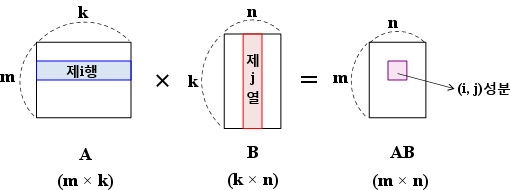

In [ ]:
# torch.mm(matrix1, matrix2)
x1 = torch.ones(2,3)
x2 = torch.ones(3,2)*2

print('x1:')
print(f'{x1}\n')

print('x2:')
print(f'{x2}\n')

out = torch.mm(x1,x2)
print('torch.mm(x1,x2):')
print(f'{out}\n')

# @ operation을 써도 같은 결과
print('x1 @ x2:')
print(f'{x1 @ x2}\n')

x1:
tensor([[1., 1., 1.],
        [1., 1., 1.]])

x2:
tensor([[2., 2.],
        [2., 2.],
        [2., 2.]])

torch.mm(x1,x2):
tensor([[6., 6.],
        [6., 6.]])

x1 @ x2:
tensor([[6., 6.],
        [6., 6.]])



`torch.bmm(input, mat2)`
- Batch 단위의 행렬곱을 수행한 텐서를 반환한다. 파이토치에서 통상적으로 첫번째 차원을 batch 차원으로 사용한다.
- `input` 이 ($b \times n \times m$), `mat2`가 ($b \times m \times p$) 일 때, ($b \times n \times p$) 사이즈의 텐서가 반환된다.
- b개의 ($n \times m$), ($m \times p$) 텐서쌍에 대해 행렬곱을 한 결과를 모아 놓은 것과 같은 결과이다.
- 마찬가지로 @연산을 사용해도 같은 결과를 도출한다. ex) `input` @ `mat2`



In [ ]:
# torch.bmm(batch_matrix1, batch_matrix2)
# batch 단위의 행렬곱
x1 = torch.ones(2,3,4)
x2 = torch.ones(2,4,5) * 2

print('x1:')
print(f'{x1}\n')

print('x2:')
print(f'{x2}\n')

out = torch.bmm(x1,x2)
print('out:')
print(f'{out}\n')

out_stack = torch.empty((2,3,5))

for i in range(2):
  out_stack[i] = torch.mm(x1[i],x2[i])

print('out_stack')
print(f'{out_stack}\n') # bmm 결과와 동일

out_at = x1 @ x2
print('@')
print(out_at)

x1:
tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

x2:
tensor([[[2., 2., 2., 2., 2.],
         [2., 2., 2., 2., 2.],
         [2., 2., 2., 2., 2.],
         [2., 2., 2., 2., 2.]],

        [[2., 2., 2., 2., 2.],
         [2., 2., 2., 2., 2.],
         [2., 2., 2., 2., 2.],
         [2., 2., 2., 2., 2.]]])

out:
tensor([[[8., 8., 8., 8., 8.],
         [8., 8., 8., 8., 8.],
         [8., 8., 8., 8., 8.]],

        [[8., 8., 8., 8., 8.],
         [8., 8., 8., 8., 8.],
         [8., 8., 8., 8., 8.]]])

out_stack
tensor([[[8., 8., 8., 8., 8.],
         [8., 8., 8., 8., 8.],
         [8., 8., 8., 8., 8.]],

        [[8., 8., 8., 8., 8.],
         [8., 8., 8., 8., 8.],
         [8., 8., 8., 8., 8.]]])

@
tensor([[[8., 8., 8., 8., 8.],
         [8., 8., 8., 8., 8.],
         [8., 8., 8., 8., 8.]],

        [[8., 8., 8., 8., 8.],
         [8., 8., 8., 8., 8.],
         [8., 8.

>**벡터의 내적(inner product)**
>
>$X = (x_1, x_2, ..., x_n)^T$
>
>$Y = (y_1, y_2, ..., y_n)^T$
>
>$<X,Y> = X^T Y = \Sigma^n_1 x_iy_i = x_1y_1 + x_2y_ + ... + x_ny_n$

`torch.dot(input, other)`
- 2개의 1D 텐서의 내적한 텐서를 반환한다.

In [ ]:
x = torch.dot(torch.tensor([2,3]), torch.tensor([2,1]))
print(x)

tensor(7)


`torch.transpose(input, dim0, dim1)`
- `input` 텐서의 dim0과 dim1을 바꾼 텐서를 반환한다.

In [ ]:
# tranpose

x1 = torch.rand(3,4)
x1_t = torch.transpose(x1,0,1)
print(f'x1.size(): {x1.size()}')
print('x1:')
print(x1)

print(f'x1_t.size(): {x1_t.size()}')
print('x1_t')
print(f'{x1_t}\n')


x2 = torch.rand(2,3,4)
x2_t_1 = torch.transpose(x2,0,1)
print(f'x2.size(): {x2.size()}')
print('x2:')
print(x2)

print(f'x2_t_1.size(): {x2_t_1.size()}')
print('x2_t_1')
print(f'{x2_t_1}\n')

x2_t_2 = torch.transpose(x2,1,2)
print(f'x2_t_2.size(): {x2_t_2.size()}')
print('x2_t_2')
print(f'{x2_t_2}\n')

x1.size(): torch.Size([3, 4])
x1:
tensor([[0.1871, 0.5741, 0.4233, 0.6558],
        [0.4269, 0.2477, 0.8482, 0.1251],
        [0.1037, 0.0788, 0.2263, 0.0922]])
x1_t.size(): torch.Size([4, 3])
x1_t
tensor([[0.1871, 0.4269, 0.1037],
        [0.5741, 0.2477, 0.0788],
        [0.4233, 0.8482, 0.2263],
        [0.6558, 0.1251, 0.0922]])

x2.size(): torch.Size([2, 3, 4])
x2:
tensor([[[0.7014, 0.7966, 0.1937, 0.4917],
         [0.0188, 0.5559, 0.1909, 0.4849],
         [0.1178, 0.8473, 0.9335, 0.6556]],

        [[0.8265, 0.3768, 0.3801, 0.5894],
         [0.0649, 0.2985, 0.0450, 0.3184],
         [0.3939, 0.7202, 0.1702, 0.2016]]])
x2_t_1.size(): torch.Size([3, 2, 4])
x2_t_1
tensor([[[0.7014, 0.7966, 0.1937, 0.4917],
         [0.8265, 0.3768, 0.3801, 0.5894]],

        [[0.0188, 0.5559, 0.1909, 0.4849],
         [0.0649, 0.2985, 0.0450, 0.3184]],

        [[0.1178, 0.8473, 0.9335, 0.6556],
         [0.3939, 0.7202, 0.1702, 0.2016]]])

x2_t_2.size(): torch.Size([2, 4, 3])
x2_t_2
tensor([[[0.

>2D 텐서의 경우 `tensor.T`을 이용해 transpose 연산을 수행할 수 있다.

In [ ]:
x = torch.randn(2,3)
print('x')
print(x)
print('x.T')
print(x.T)

x
tensor([[ 1.0013, -0.6180,  0.6385],
        [-0.6685, -0.1881,  1.4883]])
x.T
tensor([[ 1.0013, -0.6685],
        [-0.6180, -0.1881],
        [ 0.6385,  1.4883]])


`torch.permute(input, dims)`
- `input`텐서를 `dims` 순서로 permute (재배치) 한 텐서를 반환한다.
- Transpose와 달리 2개 이상의 차원을 재배치하고자 할 때 사용한다.

In [ ]:
x = torch.randn(2,3,4)
print(f'x.size(): {x.size()}')
print('x:')
print(f'{x}\n')

x_p_1 = torch.permute(x, (2,0,1))
print(f'x_p_1.size(): {x_p_1.size()}')
print('x_p_1:')
print(f'{x_p_1}\n')

x_p_2 = torch.permute(x, (0,2,1))
print(f'x_p_2.size(): {x_p_2.size()}')
print('x_p_2:')
print(f'{x_p_2}\n')

#x_p_2 는 torch.transpose(x,1,2)와 동일
x_t = torch.transpose(x,1,2)
print('x_t')
print(x_t)

x.size(): torch.Size([2, 3, 4])
x:
tensor([[[-0.6845, -0.3343,  0.6073,  0.6103],
         [ 0.0766,  1.9891,  0.1707, -2.3444],
         [-1.2577,  0.2586, -0.1986,  0.2522]],

        [[ 2.5211, -0.4223, -0.3898,  0.5066],
         [-0.6071, -0.1088, -0.1527, -1.6829],
         [-0.5502, -0.5755, -0.5895,  1.1696]]])

x_p_1.size(): torch.Size([4, 2, 3])
x_p_1:
tensor([[[-0.6845,  0.0766, -1.2577],
         [ 2.5211, -0.6071, -0.5502]],

        [[-0.3343,  1.9891,  0.2586],
         [-0.4223, -0.1088, -0.5755]],

        [[ 0.6073,  0.1707, -0.1986],
         [-0.3898, -0.1527, -0.5895]],

        [[ 0.6103, -2.3444,  0.2522],
         [ 0.5066, -1.6829,  1.1696]]])

x_p_2.size(): torch.Size([2, 4, 3])
x_p_2:
tensor([[[-0.6845,  0.0766, -1.2577],
         [-0.3343,  1.9891,  0.2586],
         [ 0.6073,  0.1707, -0.1986],
         [ 0.6103, -2.3444,  0.2522]],

        [[ 2.5211, -0.6071, -0.5502],
         [-0.4223, -0.1088, -0.5755],
         [-0.3898, -0.1527, -0.5895],
         [ 

## 1-7. 텐서 변환

>Squeeze, unsqueeze method

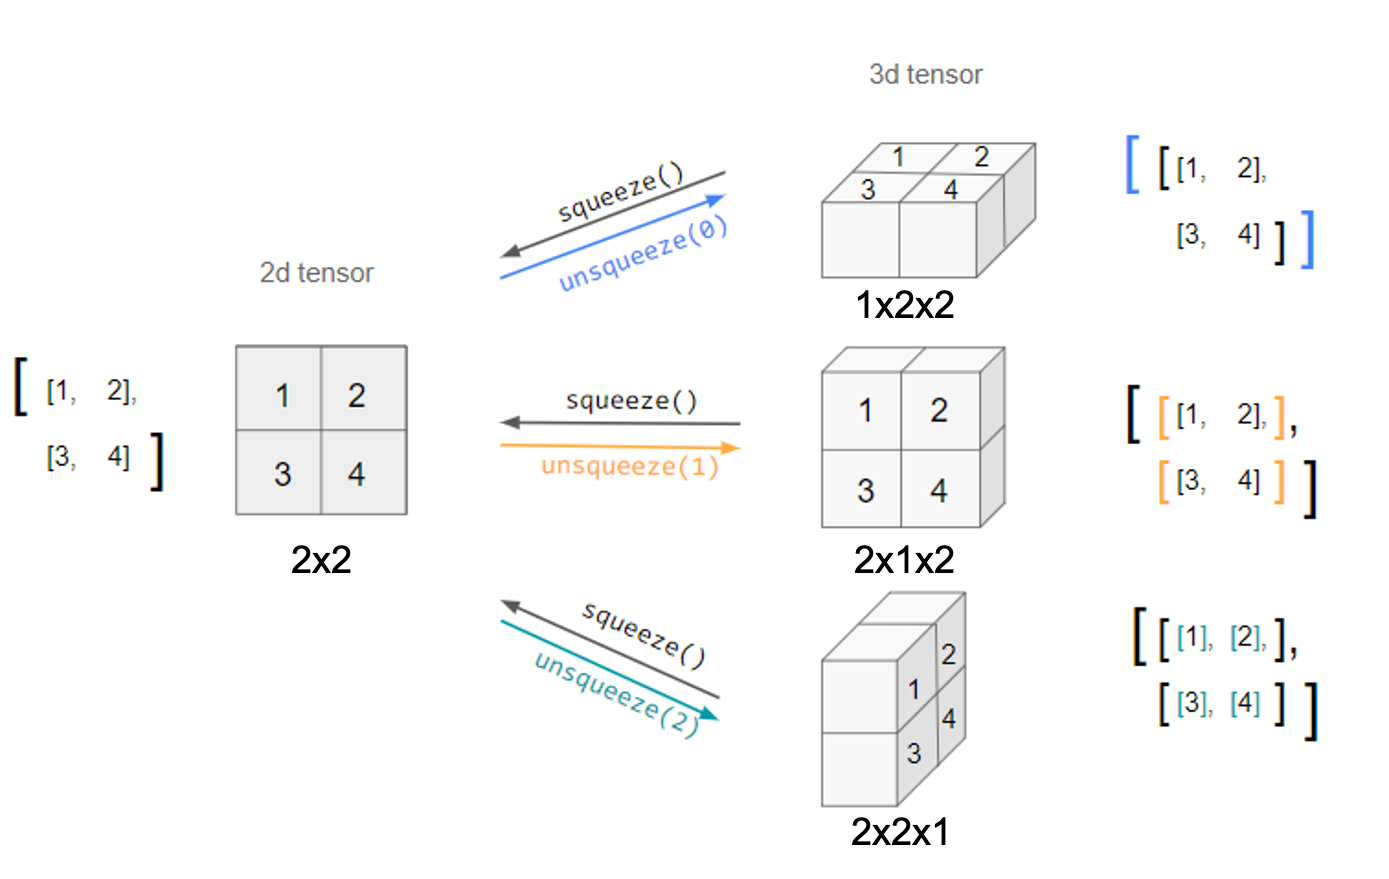

[이미지 출처](https://stackoverflow.com/questions/61598771/pytorch-squeeze-and-unsqueeze)

`torch.squeeze(input, dim=None)`
- Size가 1인 차원을 제거한 텐서를 반환한다.
- `dim` 인자가 주어진 경우, 해당 차원이 1인 경우에 해당 차원만 제거한다.

In [ ]:
x = torch.zeros(2, 1, 2, 1, 2)
print('x.size():')
print(x.size())
print('x:')
print(f'{x}\n')

y = torch.squeeze(x)
print('y.size():')
print(y.size())
print('y:')
print(f'{y}\n')

z = torch.squeeze(x, 0) # 0dim의 크기가 1이 아니기 때문에 변화 없음
print('z.size():')
print(z.size())
print('z:')
print(f'{z}\n')

w = torch.squeeze(x, 1)
print('w.size():')
print(w.size())
print('w:')
print(f'{w}\n')

x.size():
torch.Size([2, 1, 2, 1, 2])
x:
tensor([[[[[0., 0.]],

          [[0., 0.]]]],



        [[[[0., 0.]],

          [[0., 0.]]]]])

y.size():
torch.Size([2, 2, 2])
y:
tensor([[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]])

z.size():
torch.Size([2, 1, 2, 1, 2])
z:
tensor([[[[[0., 0.]],

          [[0., 0.]]]],



        [[[[0., 0.]],

          [[0., 0.]]]]])

w.size():
torch.Size([2, 2, 1, 2])
w:
tensor([[[[0., 0.]],

         [[0., 0.]]],


        [[[0., 0.]],

         [[0., 0.]]]])



`torch.unsqueeze(input, dim)`
- `dim` 위치에 새로운 크기 1의 차원이 추가된 텐서를 반환한다.

In [ ]:
x = torch.tensor([1, 2, 3, 4])
print('x.size():')
print(x.size())
print('x:')
print(f'{x}\n')

y = torch.unsqueeze(x, 0)
print('y.size():')
print(y.size())
print('y:')
print(f'{y}\n')

z = torch.unsqueeze(x, 1)
print('z.size():')
print(z.size())
print('z:')
print(f'{z}\n')

x.size():
torch.Size([4])
x:
tensor([1, 2, 3, 4])

y.size():
torch.Size([1, 4])
y:
tensor([[1, 2, 3, 4]])

z.size():
torch.Size([4, 1])
z:
tensor([[1],
        [2],
        [3],
        [4]])



`tensor.view(*shape)`
- self 와 같은 데이터를 가지는 `shape` 모양의 텐서를 반환한다. 
- `shape`의 원소로 -1이라는 차원을 사용할 경우 나머지 지정된 차원을 통해 해당 차원을 유추하여 연산을 수행한다.

In [ ]:
x = torch.randn(4,4)
y = x.view(16)
z = x.view(-1,8) # 0 차원의 사이즈가 2로 유추

print('x.size():')
print(x.size())
print('x:')
print(f'{x}\n')

print('y.size():')
print(y.size())
print('y:')
print(f'{y}\n')

print('z.size():')
print(z.size())
print('z:')
print(f'{z}\n')

x.size():
torch.Size([4, 4])
x:
tensor([[ 0.7866,  0.4089,  0.3183,  2.1494],
        [ 0.8449,  0.3760,  0.0356, -2.1531],
        [ 1.3393,  1.2040, -1.4020, -0.4322],
        [-0.5891,  0.3123, -0.1355, -0.3866]])

y.size():
torch.Size([16])
y:
tensor([ 0.7866,  0.4089,  0.3183,  2.1494,  0.8449,  0.3760,  0.0356, -2.1531,
         1.3393,  1.2040, -1.4020, -0.4322, -0.5891,  0.3123, -0.1355, -0.3866])

z.size():
torch.Size([2, 8])
z:
tensor([[ 0.7866,  0.4089,  0.3183,  2.1494,  0.8449,  0.3760,  0.0356, -2.1531],
        [ 1.3393,  1.2040, -1.4020, -0.4322, -0.5891,  0.3123, -0.1355, -0.3866]])



>텐서의 각 원소가 메모리 주소에 순서대로 저장되어있는 경우 이를 "contiguous" 하다고 부른다.
>
>`Tensor.is_contiguous()` 함수를 통해 해당 함수가 contiguous한지 확인할 수 있다.
>
>각 원소가 메모리 주소에 순서대로 저장되어 있다는 뜻은, 원소가 저장된 주소를 순서대로 출력했을 때, 각 원소의 BYTE 사이즈만큼 주소값이 커져야 한다는 것을 의미한다.
>
>`Tensor.data_ptr()` 을 통해 해당 텐서의 메모리 주소를 확인할 수 있다. 


In [ ]:
y = torch.arange(12).view(3,4).float()
print(y)
print()

for i in range(3):
    for j in range(4):
        print(y[i][j].data_ptr()) # 메모리 주소가 4씩 증가

print()
print(y.is_contiguous()) # 해당 텐서는 contiguous

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

121852992
121852996
121853000
121853004
121853008
121853012
121853016
121853020
121853024
121853028
121853032
121853036

True


> 위와 같이, float type은 4BYTE이기 때문에 메모리 주소가 순서대로 4씩 커지는 것을 확인할 수 있다. 
>
>따라서 위의 텐서는 contiguous 하다.

>double 텐서를 생성하고 메모리 주소를 출력한 경우, 메모리 주소가 8씩 커지는 것을 확인할 수 있는데 double은 64bit, 즉 8BYTE이기 때문이다.
>
>해당 텐서도 마찬가지로 contiguous 하다.

In [ ]:
y = torch.arange(12).view(3,4).double() # 이번에는 double 텐서 생성
print(y)
print()

for i in range(3):
    for j in range(4):
        print(y[i][j].data_ptr()) # 메모리 주소가 8씩 증가

print()
print(y.is_contiguous()) # 해당 텐서는 contiguous

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]], dtype=torch.float64)

121765120
121765128
121765136
121765144
121765152
121765160
121765168
121765176
121765184
121765192
121765200
121765208

True


>텐서를 생성 후 transpose 하는 경우 해당 텐서의 원소들의 주소는 순서대로 할당되어있지 않다는 것을 확인할 수 있으며 따라서 contiguous하지 않다.

In [ ]:
y = torch.arange(12).view(3,4).float()
y = y.transpose(0,1)

print(y)
print()

for i in range(4):
    for j in range(3):
        print(y[i][j].data_ptr()) # 메모리 주소가 

print()
print(y.is_contiguous()) # 해당 텐서는 not contiguous 

tensor([[ 0.,  4.,  8.],
        [ 1.,  5.,  9.],
        [ 2.,  6., 10.],
        [ 3.,  7., 11.]])

121855616
121855632
121855648
121855620
121855636
121855652
121855624
121855640
121855656
121855628
121855644
121855660

False


`torch.reshape(input, shape)`
- 텐서가 contiguous할 때 view와 동일한 역할을 한다.
- 텐서가 contiguous 하지 않은 경우 reshape 함수는 새로운 메모리를 할당한 후 shape 으로 재정렬된 텐서를 변환한다. 

In [ ]:
# 텐서가 contiguous 할 경우 view와 reshape은 동일한 역할을 함
x = torch.randn(4,4)
y = x.reshape(16)
z = x.reshape(-1,8)

print('x.size():')
print(x.size())
print('x:')
print(f'{x}\n')

print('y.size():')
print(y.size())
print('y:')
print(f'{y}\n')

print('z.size():')
print(z.size())
print('z:')
print(f'{z}\n') 

x.size():
torch.Size([4, 4])
x:
tensor([[ 0.3050,  0.3625, -0.1017,  1.3489],
        [-0.2491,  1.1461, -0.1841, -0.6988],
        [ 0.3171, -0.2332,  0.4388,  0.3745],
        [ 0.3594, -1.3755,  0.0614,  0.6686]])

y.size():
torch.Size([16])
y:
tensor([ 0.3050,  0.3625, -0.1017,  1.3489, -0.2491,  1.1461, -0.1841, -0.6988,
         0.3171, -0.2332,  0.4388,  0.3745,  0.3594, -1.3755,  0.0614,  0.6686])

z.size():
torch.Size([2, 8])
z:
tensor([[ 0.3050,  0.3625, -0.1017,  1.3489, -0.2491,  1.1461, -0.1841, -0.6988],
        [ 0.3171, -0.2332,  0.4388,  0.3745,  0.3594, -1.3755,  0.0614,  0.6686]])



>텐서가 contiguous하지 않을 경우 view는 에러가 발생한다.

In [ ]:
y = torch.arange(12).view(3,4).float()
y = y.transpose(0,1)

y = y.view(-1) # error
print(y)

RuntimeError: ignored

>reshape은 contiguous하지 않은 텐서의 shape이 변환된 복사본을 새로 할당한다.

In [ ]:
y = torch.arange(12).view(3,4).float()
y = y.transpose(0,1)

y = y.reshape(-1)
print(y)

tensor([ 0.,  4.,  8.,  1.,  5.,  9.,  2.,  6., 10.,  3.,  7., 11.])


>결론적으로, reshape은 view를 포괄하는 함수로 볼 수 있다.
>
>따라서, 일반적인 상황에서는 reshape을 이용해 텐서의 차원을 변환하는 것이 권장된다.
>

`tensor.contiguous()`
- 텐서를 contiguous하도록 메모리 주소를 재배열한다.

In [ ]:
y = torch.arange(12).view(3,4).float()
y = y.transpose(0,1)
y = y.contiguous() # contiguous

print(y.is_contiguous()) # 해당 텐서는 contiguous 
y = y.view(-1) # no error
print(y)

True
tensor([ 0.,  4.,  8.,  1.,  5.,  9.,  2.,  6., 10.,  3.,  7., 11.])


`Tensor.item()`
- 텐서의 value를 Python number로 반환한다.
- Element 가 1개인 텐서에 대해서만 작동한다.
- `float(tensor)`, `int(tensor)` 등으로도 Python number로 변환 가능하다.

In [ ]:
# item()

x = torch.randn(1)

print('x')
print(f'{x}\n')
print('x.item()')
print(f'{x.item()}\n')

float_x = float(x)
print('float(x)')
print(f'{float_x}\n')

int_x = int(x)
print('int(x)')
print(f'{int_x}\n')

x
tensor([1.2040])

x.item()
1.203959345817566

float(x)
1.203959345817566

int(x)
1



# 2. Tensor to Numpy, Numpy to Tensor

`Tensor.numpy()`
- 텐서의 데이터를 갖는 NumPy `ndarray`를 반환한다.
- 텐서와 ndarray는 메모리를 공유하기 때문에, 둘 중 하나의 값이 바뀌게 되면 나머지의 값도 바뀐다. 

In [ ]:
import numpy as np

a = torch.ones(5) # 1로 채워진 텐서를 생성
print('a:')
print(a)
print(f'{type(a)}\n')


b = a.numpy() # NumPy array로 변환
print('b:')
print(b)
print(f'{type(b)}\n')

a[2] = 2 # a의 값 변화
print('a:')
print(a)

print('b:')
print(b) # a와 b는 같은 storage를 공유, b의 값도 변화

a:
tensor([1., 1., 1., 1., 1.])
<class 'torch.Tensor'>

b:
[1. 1. 1. 1. 1.]
<class 'numpy.ndarray'>
a:
tensor([1., 1., 2., 1., 1.])
b:
[1. 1. 2. 1. 1.]


`torch.from_numpy(ndarray)`
- `numpy.ndarray`로부터 텐서를 생성한다.
- `torch.tensor(ndarray)` 도 동일한 역할을 한다.

In [ ]:
a = np.ones(5) 
b = torch.from_numpy(a)
b1 = torch.tensor(a)

print(a)
print(b) 
print(b1) # torch.tensor(ndarray)도 같은 역할 수행

[1. 1. 1. 1. 1.]
tensor([1., 1., 1., 1., 1.], dtype=torch.float64)
tensor([1., 1., 1., 1., 1.], dtype=torch.float64)


# 3. Tensor on GPU

>GPU의 병렬연산을 이용하는 경우, CPU를 사용할 때 보다 텐서 operation을 보다 빠르게 수행할 수 있다.
>
>GPU를 이용해 텐서 operation을 수행하고자 하는 경우, 일반적으로 GPU를 이용한 연산 관련 라이브러리를 이용할 수 있으며, 대표적으로 NVIDIA사의 GPU의 경우 CUDA(Computed Unified Device Architecture) 라이브러리를 이용할 수 있다.

`Tensor.device`
- 텐서의 현재 device 위치를 확인할 수 있다.


In [ ]:
x = torch.FloatTensor([[1,2,3],[4,5,6]])
print(x.device)

cpu


`torch.cuda.is_available()`
- CUDA 사용이 가능한지(gpu 사용 가능한지)를 boolean 값으로 반환한다.

In [28]:
print(torch.__version__)
print(torch.cuda.is_available())

2.1.2+cpu
False


>Google Colab의 경우 `런타임>런타임 유형 변경>하드웨어 가속기 옵션을` GPU로 설정해 CUDA환경을 사용할 수 있다.
>
>하드웨어 설정을 바꿀 경우 세션이 초기화되므로 주의한다.

In [ ]:
# GPU 설정 후 실행
import torch # 세션이 초기화 되었기 때문에 다시 import

torch.cuda.is_available()

True

>shell 명령어로 `nvidia-smi`를 사용하면 현재 머신에서 사용가능한 GPU 정보를 확인할 수 있다.


In [ ]:
!nvidia-smi

Fri Dec 30 07:00:23 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8    11W /  70W |      3MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [29]:
x.to('cuda')

AssertionError: Torch not compiled with CUDA enabled

>- 현재 한개의 Tesla T4 GPU가 사용 가능 하다.
>- 두번째 열: 현재 GPU메모리를 사용하고 있지 않다.
>- 세번째 열: GPU연산을 하고 있지 않기 때문에 GPU-Util이 0% 이다.

>위에서 학습했던 `Tensor.to(device)`는 텐서의 device 위치를 바꾸는 역할도 수행할 수 있다.
>
>텐서를 GPU 메모리에 할당하기 위해서는 `device`인자를 이용해 string형식의 GPU 이름 ("cuda:{gpu_id}") 혹은 `torch.device("cuda:{gpu_id}")` object를 입력한다.

In [ ]:
x = torch.FloatTensor([[1,2,3],[4,5,6]])
print('x:')
print(f'{x}\n')

x_cuda1 = x.to("cuda:0") # 0번 gpu 메모리로 
print('x_cuda1:')
print(f'{x_cuda1}\n')

device = torch.device("cuda:0")
x_cuda2 = x.to(device) # 같은 역할

print('device:')
print(f'{device}\n')
print('x_cuda2:')
print(f'{x_cuda2}\n')

x:
tensor([[1., 2., 3.],
        [4., 5., 6.]])

x_cuda1:
tensor([[1., 2., 3.],
        [4., 5., 6.]], device='cuda:0')

device:
cuda:0

x_cuda2:
tensor([[1., 2., 3.],
        [4., 5., 6.]], device='cuda:0')



>GPU 메모리에 텐서가 복사된 것을 확인할 수 있다.

In [ ]:
!nvidia-smi

Sat Dec 31 17:06:19 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   72C    P0    30W /  70W |    572MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

>GPU상의 텐서는 다시 CPU 메모리에 복사할 수 있다.

In [ ]:
print(x_cuda1.to("cpu")) # cpu 메모리로

tensor([[1., 2., 3.],
        [4., 5., 6.]])


>[주의] PyTorch operation은 기본적으로 in-place operation이 아니기 때문에 값을 할당해야 한다.


In [ ]:
print(x_cuda1.to("cpu")) # cpu 메모리에 복사본 생성
print(x_cuda1) # 그대로 gpu 메모리상에 존재

x_cuda1 = x_cuda1.to("cpu")
print(x_cuda1) # cpu 메모리상에 존재

tensor([[1., 2., 3.],
        [4., 5., 6.]])
tensor([[1., 2., 3.],
        [4., 5., 6.]], device='cuda:0')
tensor([[1., 2., 3.],
        [4., 5., 6.]])


>Safe coding: CPU, GPU 환경에 상관없이 동작하는 코드를 작성하기 위해서 다음과 같은 코드를 활용한다.

In [ ]:
gpu_id = 0 # 0번 gpu사용

x = torch.FloatTensor([[1,2,3],[4,5,6]])
print('x:')
print(f'{x}\n')

device = torch.device(f"cuda:{gpu_id}" if torch.cuda.is_available() else "cpu") # gpu 사용 가능한 경우 gpu 사용, 아닐 경우 cpu 사용
print('device:')
print(f'{device}\n')

x = x.to(device)
print('x:')
print(f'{x}\n')

x:
tensor([[1., 2., 3.],
        [4., 5., 6.]])

device:
cuda:0

x:
tensor([[1., 2., 3.],
        [4., 5., 6.]], device='cuda:0')



>연산 속도 비교: GPU는 많은 양의 계산을 병렬적으로 진행할 수 있기 때문에 큰 텐서 계산에서 CPU보다 빠른 연산이 가능하다.

In [ ]:
import time

#연산 속도 비교
# cpu 계산
x = torch.randn(100,100)
y = torch.randn(100,100)

start_time = time.time()
for i in range(10000):
    y = x@y
end_time = time.time()
total_time = end_time - start_time
print(f'CPU latency: {total_time}')


# gpu 계산
x = torch.randn(100,100)
y = torch.randn(100,100)

x = x.to('cuda:0')
y = y.to('cuda:0')
start_time = time.time()
for i in range(10000):
    y = x@y
end_time = time.time()
total_time = end_time - start_time
print(f'GPU latency: {total_time}')

CPU latency: 0.3933846950531006
GPU latency: 0.1331038475036621


- 더 많은 연산은 PyTorch document에서 확인할 수 있다. https://pytorch.org/docs/stable/torch.html